In [216]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as cnst
from scipy.optimize import curve_fit

plt.rcParams['text.usetex'] = True
plt.style.use(['science','notebook','grid'])
#constants

hbar = cnst.hbar
h=cnst.h
qe = cnst.e
me = cnst.m_e
ub = (qe*hbar)/(2*me)
u0 = cnst.mu_0
pi = np.pi

# Experiment 1

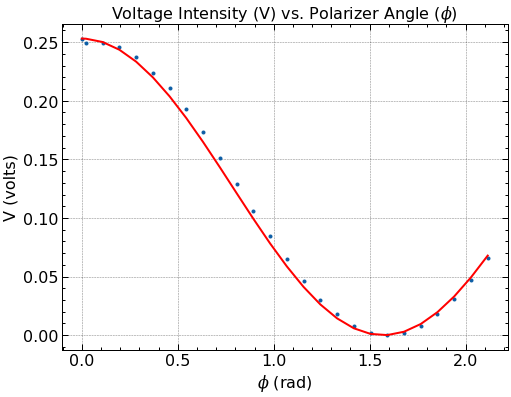

In [217]:
data=pd.read_csv('data/exp1.csv')


phi = data['phi'].values
vdc = data['vdc'].values

vmax = max(vdc)

xdata = (phi*pi)/180

yfit = vmax*((np.cos(xdata))**2)


plt.plot(xdata, vdc, marker = '.', linestyle = 'none')
plt.plot(xdata, yfit, color = 'red')
plt.title(r'Voltage Intensity (V) vs. Polarizer Angle ($\phi$)')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('V (volts)')
plt.savefig('exp1', bbox_inches='tight')
plt.show()

### Fitted line uses: $ V(\phi) = V_{0} cos^{2}(\phi)$

# Experiment 2

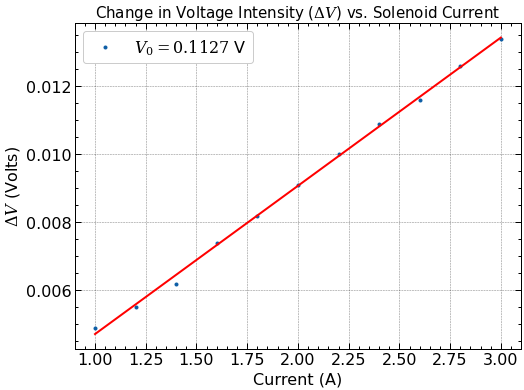

In [218]:
data2=pd.read_csv('data/exp2.csv')
I = data2['I'].values
V = data2['V'].values
V0 = 0.1127
I = I[0:11]
V = V[0:11]-V0


l=0.075
m = 11.2 * (10**(-3))

n = len(V)
dV = np.zeros(n)

a, b = np.polyfit(I, V, 1)

Vfit = a*I + b


plt.plot(I, V, marker = '.', linestyle = 'none', label = r'$V_0=0.1127$ V')
plt.title(r'Change in Voltage Intensity ($\Delta V$) vs. Solenoid Current', fontsize = 15)
plt.ylabel(r'$\Delta V$ (Volts)')
plt.xlabel('Current (A)')
plt.plot(I, Vfit, color = 'red')
plt.legend()
plt.savefig('exp2', bbox_inches='tight')
plt.show()

In [219]:
s = a
verdet1 = s/(2*V0*l*m)
verdet


array([23.02304321, 21.84762144, 21.84762144])

# Experiment 3

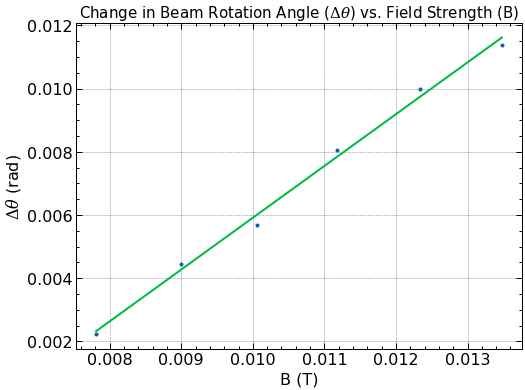

In [220]:
data3=pd.read_csv('data/exp3.csv')

I = (np.sqrt(2))*data3['I'].values
V = (10**(-3))*data3['V'].values

V0dc=0.1127
V0ac=(10**(-3))*5.182
m = 11.2*(10**(-3))
l=0.0750

    

xvals = m*I #np.array([0.706, 0.779, 0.851])
yvals = (V-V0ac)/(4*V0dc) #np.array([0.001063,  0.000875,  0.000622])

a, b = np.polyfit(xvals, yvals, 1)

slopescale = a

yfit = a*xvals + b

plt.plot(xvals, yvals, marker = '.', linestyle = 'none')
plt.title(r'Change in Beam Rotation Angle ($\Delta \theta$) vs. Field Strength (B)', fontsize = 15)
plt.xlabel(r'B (T)')
plt.ylabel(r'$\Delta \theta$ (rad)')
plt.plot(xvals, yfit)
plt.savefig('exp3', bbox_inches='tight')
plt.show()

In [221]:
verdet2 = a/(l)

# Experiment 4

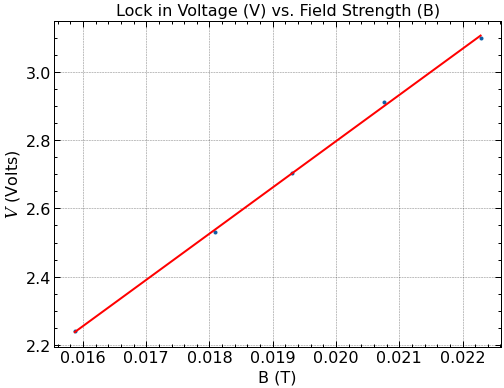

In [222]:
data4=pd.read_csv('data/exp4.csv')

I = data4['I'].values
V = data4['V'].values

xvals = m*I*(np.sqrt(2))
yvals = V/2

a, b = np.polyfit(xvals, yvals, 1)

yfit = a*xvals + b

plt.plot(xvals, yvals, marker = '.', linestyle = 'none')
plt.plot(xvals, yfit, color = 'red' )
plt.title('Lock in Voltage (V) vs. Field Strength (B)')
plt.xlabel(r'B (T)')
plt.ylabel(r'$V$ (Volts)')
plt.savefig('exp4a', bbox_inches='tight')
plt.show()

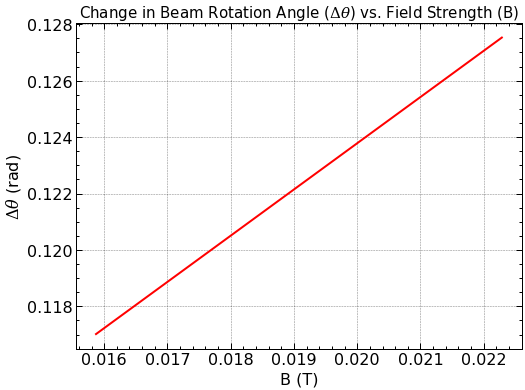

In [223]:
c = slopescale/a

yfit2 = slopescale*xvals + b

plt.plot(xvals, yfit2, color = 'red' )
plt.title(r'Change in Beam Rotation Angle ($\Delta \theta$) vs. Field Strength (B)', fontsize = 15)
plt.xlabel(r'B (T)')
plt.ylabel(r'$\Delta \theta$ (rad)')
plt.savefig('exp4b', bbox_inches='tight')
plt.show()

In [224]:
verdet3 = slopescale/l

verdet = np.array([verdet1, verdet2, verdet3])

print(verdet)

[23.02304321 21.84762144 21.84762144]
